* Import the modules
* Import dataset from sklearn.datasets

In [1]:
import keras
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

* Load the dataset

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

* Split the data into train and test subsets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("TRAIN")
print(X_train)
print("TEST")
print(X_test)

TRAIN
[[9.029e+00 1.733e+01 5.879e+01 ... 1.750e-01 4.228e-01 1.175e-01]
 [2.109e+01 2.657e+01 1.427e+02 ... 2.903e-01 4.098e-01 1.284e-01]
 [9.173e+00 1.386e+01 5.920e+01 ... 5.087e-02 3.282e-01 8.490e-02]
 ...
 [1.429e+01 1.682e+01 9.030e+01 ... 3.333e-02 2.458e-01 6.120e-02]
 [1.398e+01 1.962e+01 9.112e+01 ... 1.827e-01 3.179e-01 1.055e-01]
 [1.218e+01 2.052e+01 7.722e+01 ... 7.431e-02 2.694e-01 6.878e-02]]
TEST
[[1.247e+01 1.860e+01 8.109e+01 ... 1.015e-01 3.014e-01 8.750e-02]
 [1.894e+01 2.131e+01 1.236e+02 ... 1.789e-01 2.551e-01 6.589e-02]
 [1.546e+01 1.948e+01 1.017e+02 ... 1.514e-01 2.837e-01 8.019e-02]
 ...
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]
 [1.422e+01 2.785e+01 9.255e+01 ... 8.219e-02 1.890e-01 7.796e-02]
 [2.073e+01 3.112e+01 1.357e+02 ... 1.659e-01 2.868e-01 8.218e-02]]


* Normalize the features
In order for the model to have better performance and avoid bias by features that have larger values
Set up data in values between 0 and 1

In [4]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# sneak peek data
print("TRAIN")
print(X_train)
print("TEST")
print(X_test)


TRAIN
[[0.06552721 0.25769361 0.07732252 ... 0.60137457 0.52493594 0.52950153]
 [0.65620256 0.57017247 0.67420686 ... 0.9975945  0.49931007 0.62190573]
 [0.07257946 0.14034494 0.08023901 ... 0.174811   0.33845851 0.25313666]
 ...
 [0.32317939 0.2404464  0.30146536 ... 0.11453608 0.17602996 0.05222109]
 [0.30799745 0.33513696 0.30729834 ... 0.62783505 0.31815494 0.42777213]
 [0.21984426 0.36557322 0.20842225 ... 0.25536082 0.22255076 0.11648016]]
TEST
[[0.23404672 0.30064254 0.23595106 ... 0.34879725 0.2856298  0.27517803]
 [0.55090847 0.39228948 0.53834116 ... 0.61477663 0.19436231 0.09198033]
 [0.38047897 0.33040243 0.38255797 ... 0.52027491 0.25073921 0.21320787]
 ...
 [0.18752143 0.17653027 0.1845924  ... 0.33017182 0.2166371  0.19540522]
 [0.31975121 0.61345959 0.31747048 ... 0.28243986 0.06406466 0.19430315]
 [0.63857192 0.72404464 0.62441315 ... 0.57010309 0.25684999 0.23007799]]


# Define the MLP (Multi Layer Perceptron) model

* The choice of the number of layers, neurons, activation functions, and hyperparameters can affect the performance and generalization of the model. I decided on these values based  on some common practices and heuristics for MLP design, such as:
    * Using a sigmoid activation function for the output layer, since this is a binary classification problem.
    * Using a sigmoid activation function for the hidden layers, since this is a simple and smooth nonlinear function that can approximate any function.
    * Using a binary cross-entropy loss function, since this is a suitable loss for binary classification problems.
    * Using an adam optimizer, since this is a popular and efficient gradient-based optimization algorithm that can adapt the learning rate dynamically.
    * Using a small number of hidden layers (three) and neurons (16, 8, and 4), since this is a relatively small and low-dimensional dataset (569 samples and 30 features), and a complex model might overfit the data.
    * Using a validation split of 0.2, since this is a reasonable proportion of the data to use for evaluating the model during training.
    * Using 100 epochs and 32 batch size, since these are typical values that can allow the model to converge without taking too long.


In [5]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(16, activation='sigmoid', input_shape=(30,)))
model.add(keras.layers.Dense(8, activation='sigmoid'))
model.add(keras.layers.Dense(4, activation='sigmoid'))
model.add(keras.layers.Dense(1, activation='sigmoid'))

* Compile the model

In [6]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

* Train the model

In [7]:
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 13ms/step - loss: 0.6728 - accuracy: 0.6286 - val_loss: 0.6705 - val_accuracy: 0.6228
Epoch 2/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6674 - accuracy: 0.6286 - val_loss: 0.6658 - val_accuracy: 0.6228
Epoch 3/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6629 - accuracy: 0.6286 - val_loss: 0.6631 - val_accuracy: 0.6228
Epoch 4/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6603 - accuracy: 0.6286 - val_loss: 0.6610 - val_accuracy: 0.6228
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6582 - accuracy: 0.6286 - val_loss: 0.6592 - val_accuracy: 0.6228
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6566 - accuracy: 0.6286 - val_loss: 0.6575 - val_accuracy: 0.6228
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.6286 - val_loss: 0.6560 - val_accuracy: 0.6228
Epoch 8/100


* Evaluate the model

In [8]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

4/4 [==============================] - 0s 2ms/step - loss: 0.1241 - accuracy: 0.9737
Test loss: 0.12409792095422745
Test accuracy: 0.9736841917037964


* Generate predictions

In [9]:
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print('Predictions:', y_pred)

4/4 [==============================] - 0s 1ms/step
Predictions: [[1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]]


* Generate the confusion matrix
* Print the confusion matrix

In [10]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[41  2]
 [ 1 70]]


* Plot the confusion matrix

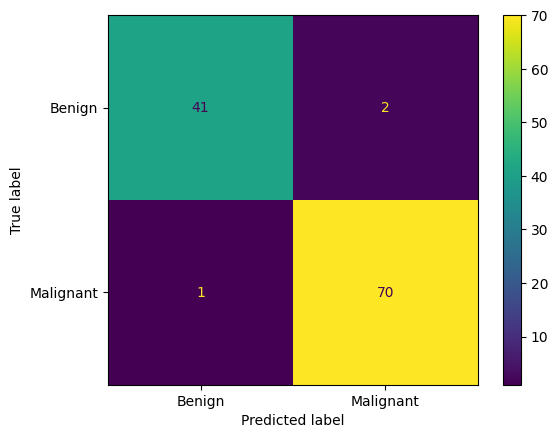

In [11]:
cmd = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
cmd.plot()
plt.show()

* Get the Precision, which is the proportion of positive predictions that are actually positive

In [12]:
precision = precision_score(y_test, y_pred)
print('Precision score:', precision)

Precision score: 0.9722222222222222


* Get the F1 score, which is the harmonic mean or precision and recall that measures the balance between them
* Get the recall score, which os the proportion of positive samples that are correctly predicted

In [13]:
recall = recall_score(y_test, y_pred)
print("*----------------------------*")
print("Recall: ", recall)
f1 = f1_score(y_test, y_pred)
print("*----------------------------*")
print("f1: ", f1)
print("*----------------------------*")


*----------------------------*
Recall:  0.9859154929577465
*----------------------------*
f1:  0.979020979020979
*----------------------------*


# Conclusions from MLP

Based on these results for the confusion matrix, I would conclude that the classification model is very accurate and has high performance on the test set.

# Results analysis
* Accuracy 0.973 this means that the model predicted correctly 97.37% of the test samples
* Precision 
    * 0.9722 for positive (malignant) calculated by the formula TP/(TP + FP) giving a 97.22% of correctly predicted malignant samples
    * 0.9762 for negative (benignant) calculated by the formula TN/(TN + FN) giving a 97.62% of correctly predicted benign samples
* Recall 
    * 0.9859 Proportion of positive samples (malignant) that are correctly determined by the formula TP/(TP + FN) meaning 98.58% correct predictions
    * 0.9535 Proportion of negative samples (benign)    that are correctly determined by the formula FN/(FN + TN) meaning 95.35% correct predictions
* F1 score: The harmonic mean of precision and recall that measures the balance between them calculated by: 2 * (precision * recall) / (precision + recall)
    * positive (malignant): 0.9790 which means there's a high balance between precision and recall for the malignan samples
    * negative (benign):    0.9648 which means there's a high balance between precision and recall for the benign   samples

* There's a very good overall score for the MLP approach to this dataset
